In [37]:
from keras.datasets import cifar100

import collections, numpy
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB1
from tensorflow.keras.utils import plot_model

In [29]:
data=cifar100.load_data(label_mode='fine')
(x_train, y_train), (x_test, y_test) = data

In [30]:
#data size
len(x_train)+len(x_test)

60000

In [31]:
#sample dimensions
x_train[0].shape

(32, 32, 3)

In [32]:
#train data calsses
unique, counts = numpy.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 500,
 1: 500,
 2: 500,
 3: 500,
 4: 500,
 5: 500,
 6: 500,
 7: 500,
 8: 500,
 9: 500,
 10: 500,
 11: 500,
 12: 500,
 13: 500,
 14: 500,
 15: 500,
 16: 500,
 17: 500,
 18: 500,
 19: 500,
 20: 500,
 21: 500,
 22: 500,
 23: 500,
 24: 500,
 25: 500,
 26: 500,
 27: 500,
 28: 500,
 29: 500,
 30: 500,
 31: 500,
 32: 500,
 33: 500,
 34: 500,
 35: 500,
 36: 500,
 37: 500,
 38: 500,
 39: 500,
 40: 500,
 41: 500,
 42: 500,
 43: 500,
 44: 500,
 45: 500,
 46: 500,
 47: 500,
 48: 500,
 49: 500,
 50: 500,
 51: 500,
 52: 500,
 53: 500,
 54: 500,
 55: 500,
 56: 500,
 57: 500,
 58: 500,
 59: 500,
 60: 500,
 61: 500,
 62: 500,
 63: 500,
 64: 500,
 65: 500,
 66: 500,
 67: 500,
 68: 500,
 69: 500,
 70: 500,
 71: 500,
 72: 500,
 73: 500,
 74: 500,
 75: 500,
 76: 500,
 77: 500,
 78: 500,
 79: 500,
 80: 500,
 81: 500,
 82: 500,
 83: 500,
 84: 500,
 85: 500,
 86: 500,
 87: 500,
 88: 500,
 89: 500,
 90: 500,
 91: 500,
 92: 500,
 93: 500,
 94: 500,
 95: 500,
 96: 500,
 97: 500,
 98: 500,
 99: 500}

In [33]:
#test data calsses
unique, counts = numpy.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 100,
 1: 100,
 2: 100,
 3: 100,
 4: 100,
 5: 100,
 6: 100,
 7: 100,
 8: 100,
 9: 100,
 10: 100,
 11: 100,
 12: 100,
 13: 100,
 14: 100,
 15: 100,
 16: 100,
 17: 100,
 18: 100,
 19: 100,
 20: 100,
 21: 100,
 22: 100,
 23: 100,
 24: 100,
 25: 100,
 26: 100,
 27: 100,
 28: 100,
 29: 100,
 30: 100,
 31: 100,
 32: 100,
 33: 100,
 34: 100,
 35: 100,
 36: 100,
 37: 100,
 38: 100,
 39: 100,
 40: 100,
 41: 100,
 42: 100,
 43: 100,
 44: 100,
 45: 100,
 46: 100,
 47: 100,
 48: 100,
 49: 100,
 50: 100,
 51: 100,
 52: 100,
 53: 100,
 54: 100,
 55: 100,
 56: 100,
 57: 100,
 58: 100,
 59: 100,
 60: 100,
 61: 100,
 62: 100,
 63: 100,
 64: 100,
 65: 100,
 66: 100,
 67: 100,
 68: 100,
 69: 100,
 70: 100,
 71: 100,
 72: 100,
 73: 100,
 74: 100,
 75: 100,
 76: 100,
 77: 100,
 78: 100,
 79: 100,
 80: 100,
 81: 100,
 82: 100,
 83: 100,
 84: 100,
 85: 100,
 86: 100,
 87: 100,
 88: 100,
 89: 100,
 90: 100,
 91: 100,
 92: 100,
 93: 100,
 94: 100,
 95: 100,
 96: 100,
 97: 100,
 98: 100,
 99: 100}

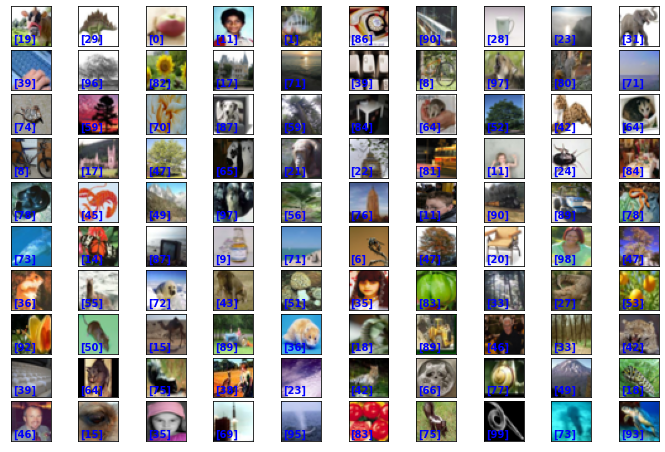

In [34]:
from matplotlib import pyplot
#ploting samples of the data
def plot_multiple_imgs(X,y,nrow=2,ncol=2,figsize=(13,7),preds=None,skip=0):
    fig,ax = pyplot.subplots(nrows=nrow,ncols=ncol,figsize=figsize)
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(nrow*ncol):
        ax[i//ncol,i%ncol].imshow(X[skip+i],cmap='binary')
        ax[i//ncol,i%ncol].set_xticks([])
        ax[i//ncol,i%ncol].set_yticks([])
        if preds is not None:
            ax[i//ncol,i%ncol].text(0.85, 0.1, str(preds[skip+i]), transform=ax[i//ncol,i%ncol].transAxes,
                                   color='green' if y[skip+i]==preds[skip+i] else 'red',weight='bold')
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='blue',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
        else:
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='blue',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
    pyplot.show()
plot_multiple_imgs(x_train,y_train,10,10,(12,8))

In [35]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [38]:
model = models.Sequential()
model.add(EfficientNetB0(input_shape = (32, 32, 3), include_top = False, weights = 'imagenet'))
    
model.add(layers.GlobalAveragePooling2D())
    
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(100, activation = 'softmax'))

16711680/16705208 [==============================] - 5s 0us/step


In [42]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = Adam(learning_rate = 0.001),
             metrics = ['accuracy'])

In [44]:
hist=model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50


ValueError: in user code:

    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:748 train_step
        loss = self.compiled_loss(
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1566 sparse_categorical_crossentropy
        return K.sparse_categorical_crossentropy(
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4782 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:4174 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/deepankarsingh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:4087 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (3200,)) should equal the shape of logits except for the last dimension (received (32, 100)).


In [36]:
#building the model
model = Sequential()

model.add(Conv2D(128,(3,3), padding = 'same',activation='elu', input_shape = x_train.shape[1:]))
model.add(Conv2D(128, (3,3),activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3),activation='elu', padding='same'))
model.add(Conv2D(256, (3, 3),activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3),activation='elu', padding='same'))
model.add(Conv2D(512, (3, 3),activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation("softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.rmsprop(lr=0.0001, decay = 1e-6), metrics=['accuracy'])

In [ ]:
#Train the model
hist=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 51s 1ms/step - loss: 4.4475 - acc: 0.0921 - val_loss: 3.4344 - val_acc: 0.1916
Epoch 2/50
40000/40000 [==============================] - 50s 1ms/step - loss: 3.4048 - acc: 0.1987 - val_loss: 3.1050 - val_acc: 0.2546
Epoch 3/50
40000/40000 [==============================] - 50s 1ms/step - loss: 3.0581 - acc: 0.2638 - val_loss: 2.8707 - val_acc: 0.3109
Epoch 4/50
40000/40000 [==============================] - 50s 1ms/step - loss: 2.7790 - acc: 0.3188 - val_loss: 2.7216 - val_acc: 0.3386
Epoch 5/50
40000/40000 [==============================] - 50s 1ms/step - loss: 2.5646 - acc: 0.3608 - val_loss: 2.3650 - val_acc: 0.4041
Epoch 6/50
40000/40000 [==============================] - 50s 1ms/step - loss: 2.3565 - acc: 0.4016 - val_loss: 2.2793 - val_acc: 0.4220
Epoch 7/50
40000/40000 [==============================] - 50s 1ms/step - loss: 2.1812 - acc: 0.4368 - val_loss: 2.1274 - val_acc

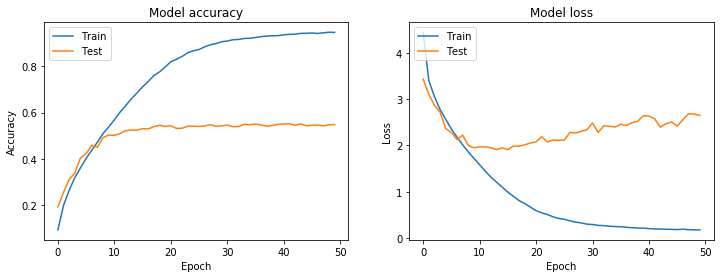

In [ ]:
# Plot training & validation loss values
fig, ax = pyplot.subplots(1,2,figsize=(12,4))
ax[0].plot(hist.history['acc'])
ax[0].plot(hist.history['val_acc'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='upper left')

ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper left')
pyplot.show()

as you can see in the new model graphs, the model is more overfitted to the training data, eventhough the model is overfitted the testing results are also better then the previous model(raised from 43% to 55%).

model accuracy on test set is: 55.76%


Text(0.5, 1, 'classification results on test set')

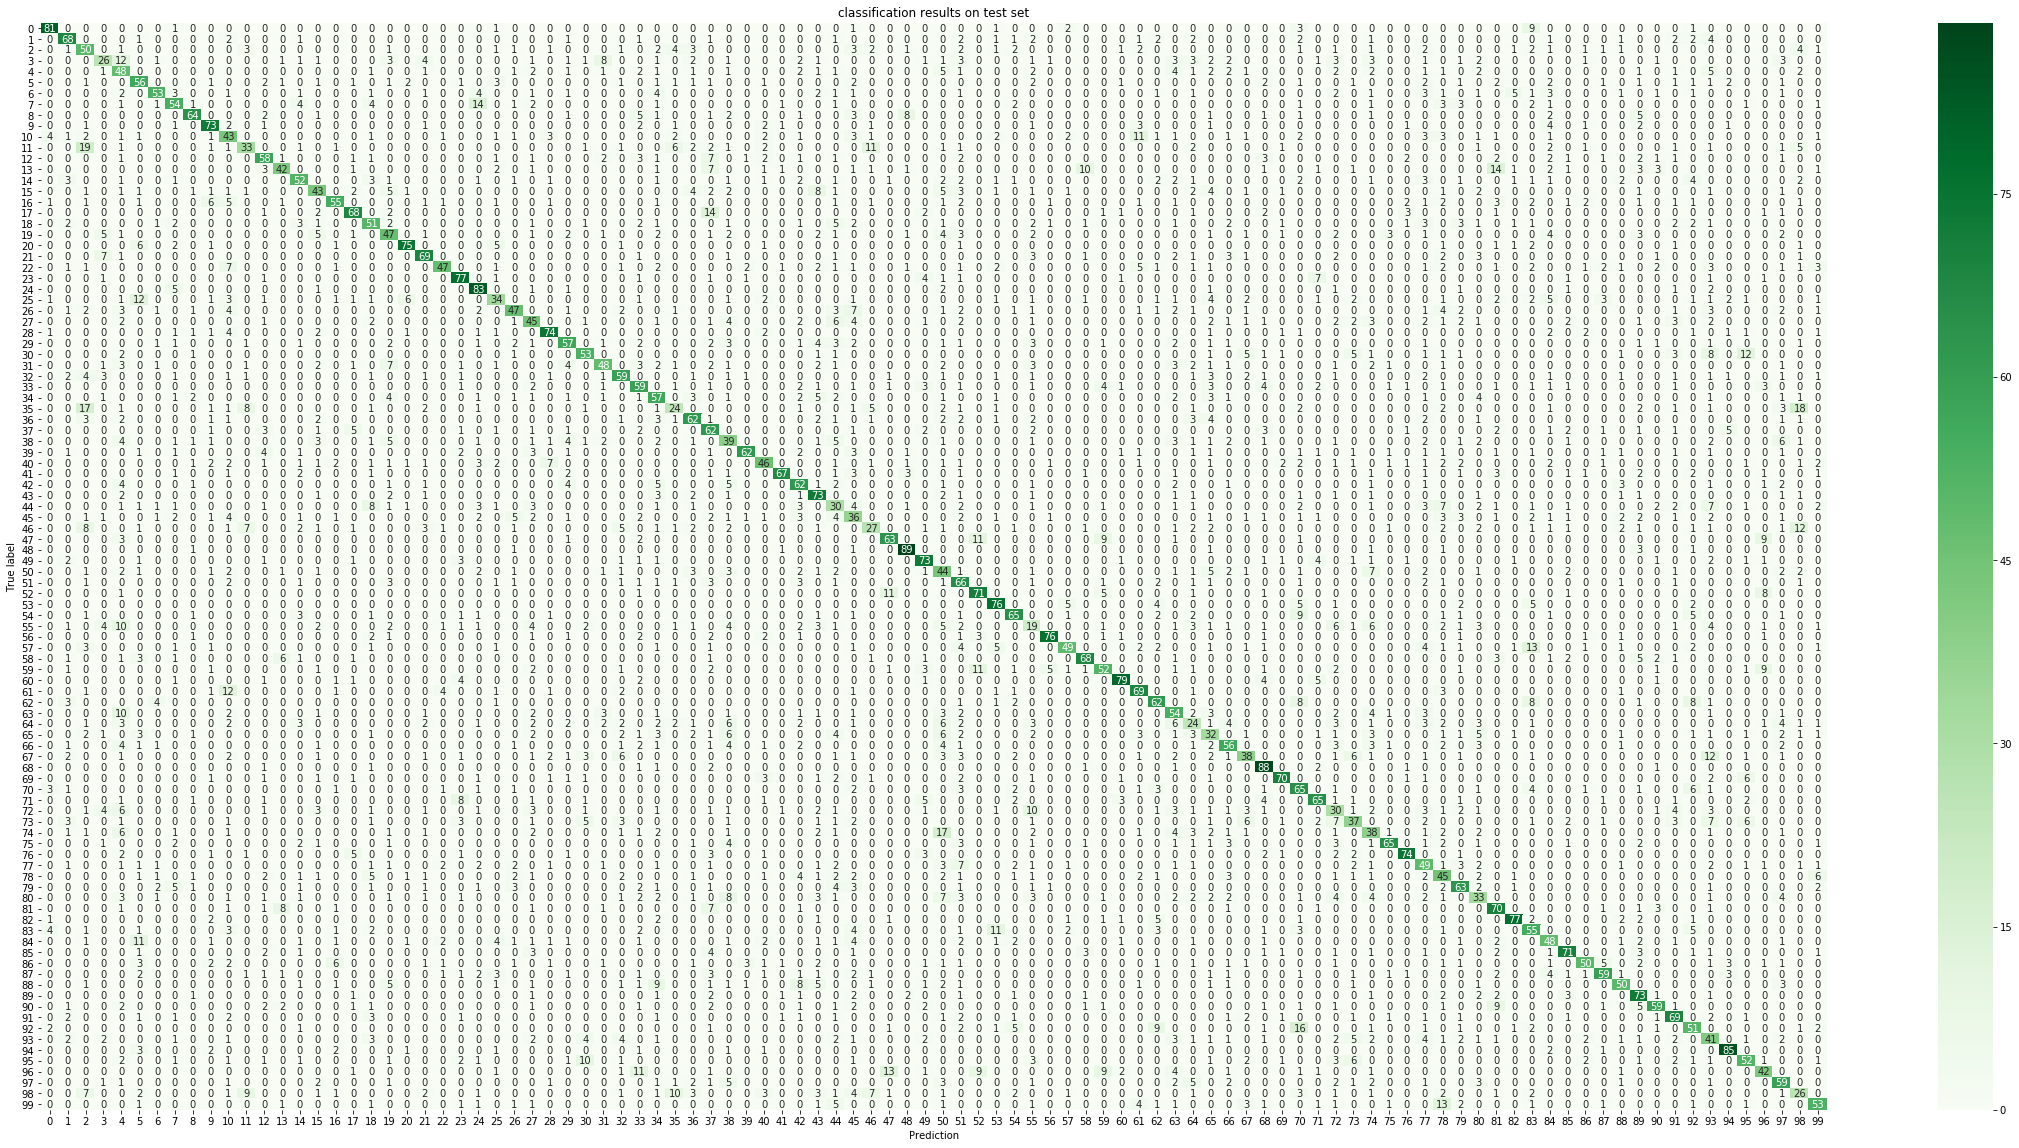

In [ ]:
#plot the confusion matrix
preds = model.predict(x_test)
pred_cat = np.argmax(preds,axis=1)
print('model accuracy on test set is: {0:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),pred_cat)*100))
fig, ax = pyplot.subplots(figsize=(40,20))
ax=sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),pred_cat),cmap='Greens',annot=True, fmt='d')
pyplot.xlabel('Prediction')
pyplot.ylabel('True label')
pyplot.title('classification results on test set')